# Cyber Security
Course-end Project 3

## DESCRIPTION

## Problem Statement:

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

 

### Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 -1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.


## Project Task: Week 1

### Exploratory Data Analysis:

1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

2. Determine the number of samples present in the data, unique elements in all the features. 

3. Check if there is any null value in any features. 


In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sb = '\033[1m'    # Python print format start of bold font tag
eb = '\033[0m'    # Python print format end of bold font tag


In [2]:
# Load dataset

df = pd.read_csv('dataset.csv')
df.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Show size of dataset

df.shape


(11055, 32)

#### Dataset has 11,055 rows and 32 columns

In [4]:
# Analyse statistical information

df.describe().T


,count,mean,std,min,25%,50%,75%,max
index,11055.0,5528.000000,3191.447947,1.0,2764.5,5528.0,8291.5,11055.0
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0


### 1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps.

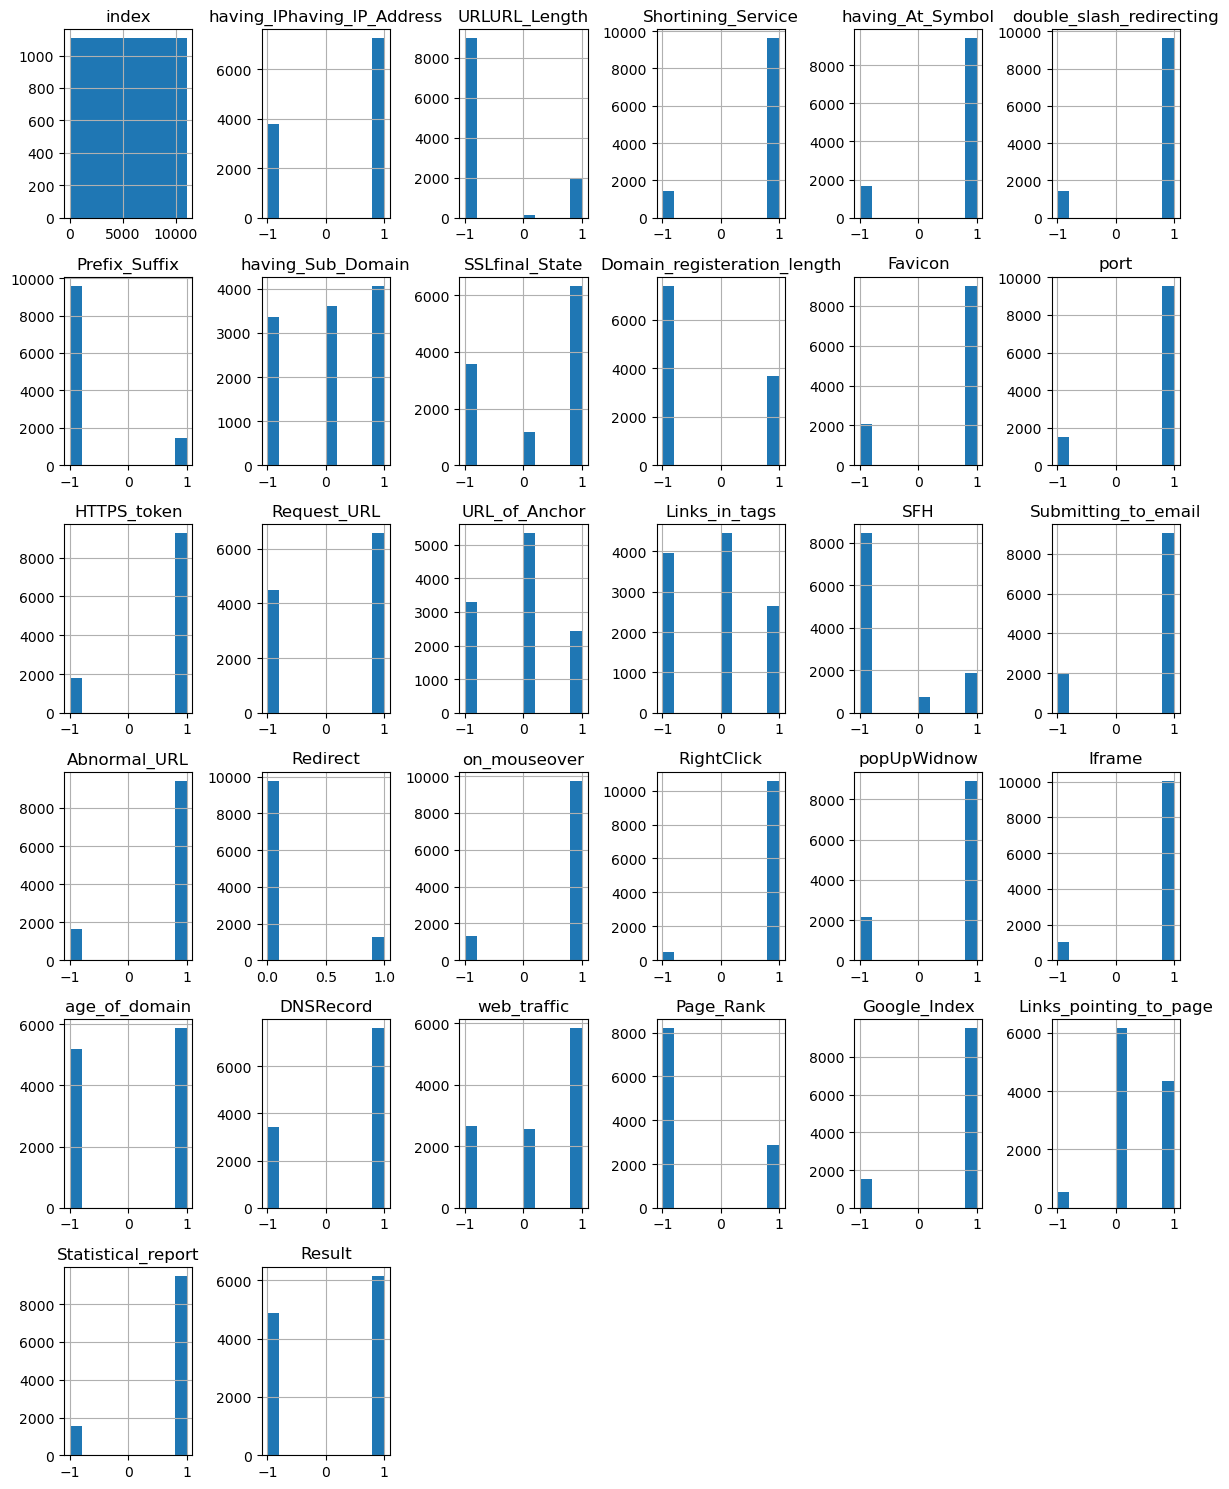

In [5]:
# Explore data using histogram

df.iloc[:,:].hist(figsize=(12,15))
plt.tight_layout()
plt.show()


#### Features that are more prone to be legitimate (1) than phishing (-1) URLs:
- (1) `having_IPhaving_IP_Address`  (2) `Shortining_Service`  (3) `having_At_Symbol`     (4) `double_slash_redirecting`  (5) `Favicon`
- (6) `port`                        (7) `HTTPS_token`         (8) `Request_URL`          (9) `Submitting_to_email`      (10) `Abnormal_URL` 
- (11) `on_mouseover`              (12) `RightClick`         (13) `popUpWidnow`         (14) `Iframe`                   (15) `age_of_domain` 
- (16) `DNSRecord`                 (17) `Google_Index`       (18) `Statistical_report`  (19) `Result`

#### Features that are more prone to be phishing (-1) than legitimate (1) URLs:
- (20) `Prefix_Suffix`   (21) `Domain_registeration_length`  (22) `Page_Rank`

#### Features that are more prone to be legitimate (1) than phishing (-1) and with some suspicious (0) URLs:
- (23) `having_Sub_Domain`     (24) `SSLfinal_State`    (25) `web_traffic`     (26) `Links_pointing_to_page`

#### Features that are more prone to be phishing (-1) than legitimate (1) with some suspicious (0) URLs:
- (27) `URLURL_Length`         (28) `URL_of_Anchor`     (29) `Links_in_tags`   (30) `SFH`

- Feature `Redirect` only have either suspicious (0) or legitimate URLs

- Feature `index` indicates the numerical sequence of the samples.


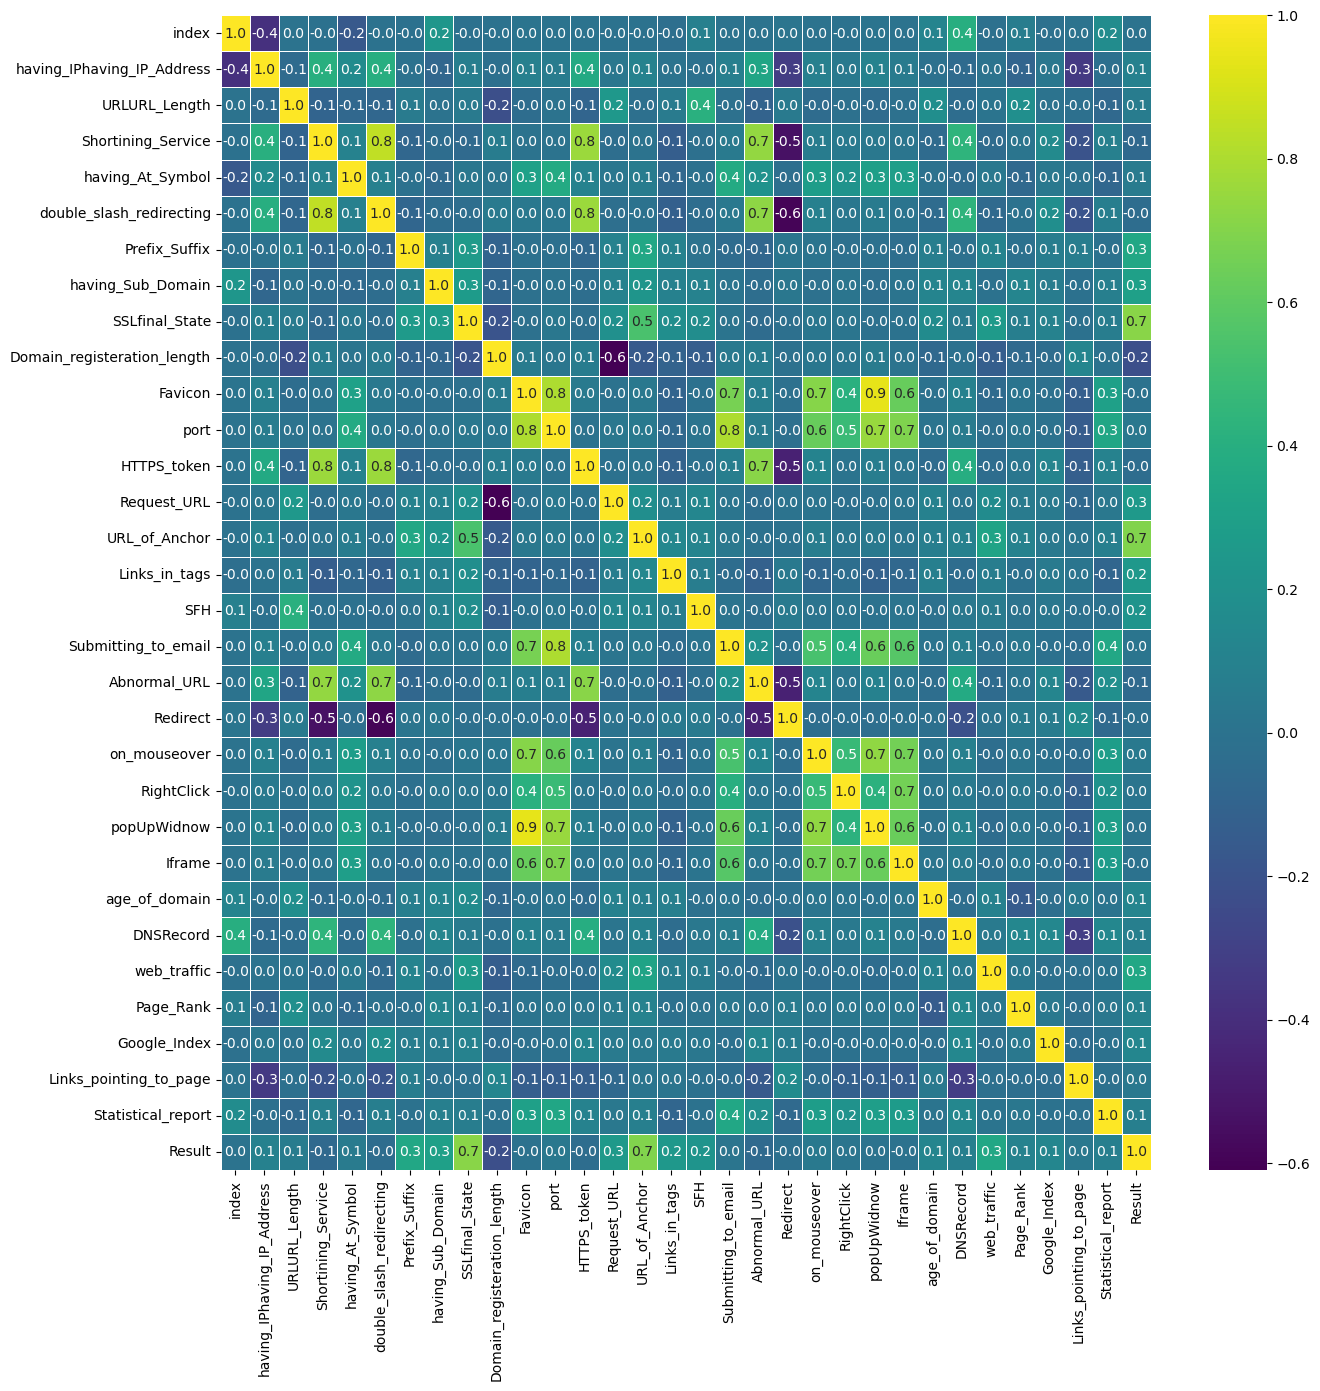

In [6]:
# Explore data using heatmap

corr = df.iloc[:,:].corr()

plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, linewidths=0.5, fmt='.1f', cmap='viridis');


#### Correlation groups shown in heatmap with threshold
- (0.9) [Favicon, popUpWindow]
- (0.8) [Submitting_to_email, port], [Shortining_Service, HTTPS_token], [Shortining_Service, double_slash_redirecting], [port, Favicon]
- (0.7) [Shortining_Service, Abnormal_URL], [double_slash_redirecting, Abnormal_URL], [HTTPS_token, Abnormal_URL], [Submitting_to_email, Favicon]
- (0.7) [on_mouseover, Favicon], [on_mouseover, popUpWidnow], [on_mouseover, Iframe], [popUpWidnow, port], [Iframe, port], [Iframe, RightClick]
- (0.7) [Result,, SSfinal_State[, [Result, URL_of_Anchor]
- (-0.6) [Redirect, double_slash_redirecting], [Domain_registeration_length, Request_URL]
- (-0.5) [Redirect, Shortining_Service], [Redirect, HTTPS_token], [Redirect, Abnormal_URL]


### 2. Determine the number of samples present in the data, unique elements in all the features.

In [7]:
# 2. Determine the number of samples present in the data, unique elements in all the features.

print(sb + 'Number of samples:' + eb, df.shape[0], '\n')

print(sb + 'Column Name \t\t\t Unique value count \t Unique values for each elements' + eb)
for col in df.columns:
    print(col, ' '*(31 - len(col)), df[col].nunique(), '\t\t\t', df[col].unique())
    

Number of samples: 11055 

Column Name 			 Unique value count 	 Unique values for each elements
index                            11055 			 [    1     2     3 ... 11053 11054 11055]
having_IPhaving_IP_Address       2 			 [-1  1]
URLURL_Length                    3 			 [ 1  0 -1]
Shortining_Service               2 			 [ 1 -1]
having_At_Symbol                 2 			 [ 1 -1]
double_slash_redirecting         2 			 [-1  1]
Prefix_Suffix                    2 			 [-1  1]
having_Sub_Domain                3 			 [-1  0  1]
SSLfinal_State                   3 			 [-1  1  0]
Domain_registeration_length      2 			 [-1  1]
Favicon                          2 			 [ 1 -1]
port                             2 			 [ 1 -1]
HTTPS_token                      2 			 [-1  1]
Request_URL                      2 			 [ 1 -1]
URL_of_Anchor                    3 			 [-1  0  1]
Links_in_tags                    3 			 [ 1 -1  0]
SFH                              3 			 [-1  1  0]
Submitting_to_email              2 			 [-1  1]
Ab

#### Observation:
- There are 11055 samples in the dataset
- Feature `index` has unique values ranging from 1 to 11055
- Features `URLURL_Length`, `having_Sub_Domain`, `SSLfinal_State`, `URL_of_Anchor`, `Links_in_tags`, `SFH`, `web_traffic` and `Links_pointing_to_page` have unique values 1,  0 and -1.
- Feature `Redirect` has unique values 0 and 1
- All other features have unique value -1 and 1


The `index` feature is just a sequence of number ranging from 1 to 11055 used to index the number of samples. We can remove it from the dataframe.


In [8]:
print(sb + "Value Count for each columns (excluding 'index')" + eb)

print(sb + "Column (col)\t\t\tIndex", "\t\t", "Value Counts" + eb)
for col in df.columns[1:]:
    val_count = df[col].value_counts()
    print(col, " "*(30-len(col)), val_count.index.values, " "*3, "\t", val_count.values)
    

Value Count for each columns (excluding 'index')
Column (col)			Index 		 Value Counts
having_IPhaving_IP_Address      [ 1 -1]     	 [7262 3793]
URLURL_Length                   [-1  1  0]     	 [8960 1960  135]
Shortining_Service              [ 1 -1]     	 [9611 1444]
having_At_Symbol                [ 1 -1]     	 [9400 1655]
double_slash_redirecting        [ 1 -1]     	 [9626 1429]
Prefix_Suffix                   [-1  1]     	 [9590 1465]
having_Sub_Domain               [ 1  0 -1]     	 [4070 3622 3363]
SSLfinal_State                  [ 1 -1  0]     	 [6331 3557 1167]
Domain_registeration_length     [-1  1]     	 [7389 3666]
Favicon                         [ 1 -1]     	 [9002 2053]
port                            [ 1 -1]     	 [9553 1502]
HTTPS_token                     [ 1 -1]     	 [9259 1796]
Request_URL                     [ 1 -1]     	 [6560 4495]
URL_of_Anchor                   [ 0 -1  1]     	 [5337 3282 2436]
Links_in_tags                   [ 0 -1  1]     	 [4449 3956 2650]
SFH 

### 3. Check if there is any null value in any features.

In [9]:
# Explore dataset information

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [10]:
# 3. Check if there is any null value in any features.

df.isna().any().sum()


0

**Observations:** There are no NULL values in any of the features

## Project Task: Week 2

### Correlation of features and feature selection:

Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.


In [11]:
# Split the dataset into features (X) and target (y)
# Drop columns index and Result for X and make Result the target

X = df.drop(columns=['index', 'Result'], axis=1)
y = df['Result']


#### Use DropCorrelatedFeatures from feature.engine.selection to remove features which might be correlated with threshold 0.7 

In [12]:
# Find the correlated features to remove with threshold 0.7

from feature_engine.selection import DropCorrelatedFeatures

dcf = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.7)
dcf.fit(X)
dcf.features_to_drop_


{'Abnormal_URL',
 'HTTPS_token',
 'double_slash_redirecting',
 'on_mouseover',
 'popUpWidnow',
 'port'}

In [13]:
# Remove the correlated features detected

X = dcf.transform(X)


In [14]:
# Show the remaining features in the dataset

X.columns


Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Redirect', 'RightClick', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

## Project Task: Week 3 and 4

### Building Classification Model: 

Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.


1. Build classification models using a binary classifier to detect malicious or phishing URLs.

2. Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

3. Validate the accuracy of data by the K-Fold cross-validation technique.

4. The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.


In [15]:
# Split data to train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


### 1. Build classification models using a binary classifier to detect malicious or phishing URLs.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve

'''
Function to build the model specified by model_name.

Get the probability prediction for the dataset and
find the the fpr (False Positive Rate),
tpr (True Positive Rate) and the AUC (Area Under Curve) 
with the roc_curve() and auc() functions

Return the model, fpr, tpr and auc values
'''

def build_model(model_name, X_train, X_test, y_train, y_test):
    # Initiate the model using default parameters
    if model_name == 'LogisticRegression':
        model = LogisticRegression()
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif model_name == 'SVC':
        model = SVC(probability=True)   # set to use predict_proba
    elif model_name == 'KNeigborsClassifier':
        model = KNeighborsClassifier()
    else:
        print('Model not implemented')
        return
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Get the prediction probability 
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Get fpr, tpr from roc_curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Get area under the cureve from auc
    area_under_curve = auc(fpr, tpr)
    
    return model, fpr, tpr, area_under_curve


In [17]:
# Build the LogisticRegression model

lr, fpr_lr, tpr_lr, auc_lr = build_model('LogisticRegression', X_train, X_test, y_train, y_test)


In [18]:
# Build the RandomForestClassifier model

rfc, fpr_rfc, tpr_rfc, auc_rfc = build_model('RandomForestClassifier', X_train, X_test, y_train, y_test)


In [19]:
# Build the SVC model

svc, fpr_svc, tpr_svc, auc_svc = build_model('SVC', X_train, X_test, y_train, y_test)


In [20]:
# Build the KNeigborsClassifier model

knn, fpr_knn, tpr_knn, auc_knn = build_model('KNeigborsClassifier', X_train, X_test, y_train, y_test)


### 2. Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

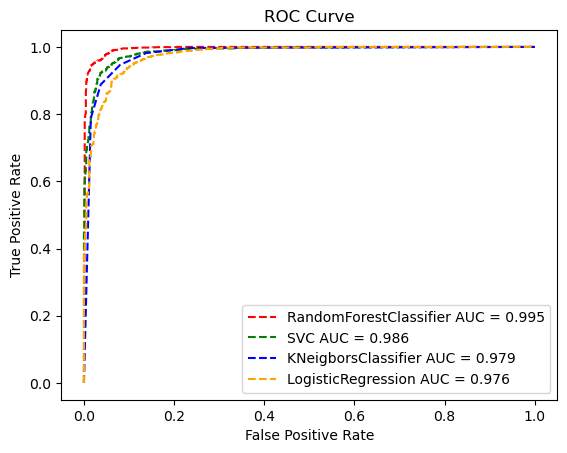

In [21]:
# Plot the ROC Curve for each model

plt.plot(fpr_rfc, tpr_rfc, linestyle='--', color='red', label=f'RandomForestClassifier AUC = {auc_rfc:.3f}')
plt.plot(fpr_svc, tpr_svc, linestyle='--', color='green', label=f'SVC AUC = {auc_svc:.3f}')
plt.plot(fpr_knn, tpr_knn, linestyle='--', color='blue', label=f'KNeigborsClassifier AUC = {auc_knn:.3f}')
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='orange', label=f'LogisticRegression AUC = {auc_lr:.3f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


### 3. Validate the accuracy of data by the K-Fold cross-validation technique.

In [22]:
from sklearn.model_selection import cross_val_score

'''
Function to get average accuracy score for Train data
and accuracy scores for Test (validation) data using
K-Fold cross-validation function cross_val_score.

Default to use 10 folds cv

Return the average accuracy score for train data and
the accuracy score from the model for validation data
'''

def validate_accuracy(model, X_train, X_test, y_train, y_test, cv=10):
    # Get accuracy scores for train data
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    # Get the average score
    average_score = np.mean(scores)
    
    # Get the accuracy score for the test data from the model
    test_scores = model.score(X_test, y_test)
    
    print(f"Train Score: {average_score}")
    print(f"Test Score:  {test_scores}")
    
    return average_score, test_scores


In [23]:
# Validate the accuracy of data for LogisticRegression model

print("LogisticRegression model - Accuracy of data with 10 K-Fold cross-validation:")
train_acc_lr, test_acc_lr = validate_accuracy(lr, X_train, X_test, y_train, y_test)


LogisticRegression model - Accuracy of data with 10 K-Fold cross-validation:
Train Score: 0.9294424985829931
Test Score:  0.9218523878437048


In [24]:
# Validate the accuracy of data for RandomForestClassifier model

print("RandomForestClassifer model - Accuracy of data with 10 K-Fold cross-validation:")
train_acc_rfc, test_acc_rfc = validate_accuracy(rfc, X_train, X_test, y_train, y_test)


RandomForestClassifer model - Accuracy of data with 10 K-Fold cross-validation:
Train Score: 0.9706904820730451
Test Score:  0.9667149059334298


In [25]:
# Validate the accuracy of data for SVC (Support Vector Classifier) model

print("SVC model - Accuracy of data with 10 K-Fold cross-validation:")
train_acc_svc, test_acc_svc = validate_accuracy(svc, X_train, X_test, y_train, y_test)


SVC model - Accuracy of data with 10 K-Fold cross-validation:
Train Score: 0.9475333904980598
Test Score:  0.9464544138929089


In [26]:
# Validate the accuracy of data for KNeigborsClassifer model

print("KNeighborsClassifier model - Accuracy of data with 10 K-Fold cross-validation:")
train_acc_knn, test_acc_knn = validate_accuracy(knn, X_train, X_test, y_train, y_test)


KNeighborsClassifier model - Accuracy of data with 10 K-Fold cross-validation:
Train Score: 0.9380058714956327
Test Score:  0.9352387843704776


### 4. The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [27]:
# Create final output dataframe

final_output = pd.DataFrame({'Model':['LogisticRegression', 'RandomForestClassifier', 'SVC', 'KNeighborsClassifier' ],
                             'Train Accuracy Score':[train_acc_lr, train_acc_rfc, train_acc_svc, train_acc_knn],
                             'Validation Accuracy Score':[test_acc_lr, test_acc_rfc, test_acc_svc, test_acc_knn]})

final_output = final_output.sort_values(by='Train Accuracy Score', ascending = False)
final_output = final_output.set_index('Model')

final_output


,Train Accuracy Score,Validation Accuracy Score
Model,,
RandomForestClassifier,0.970690,0.966715
SVC,0.947533,0.946454
KNeighborsClassifier,0.938006,0.935239
LogisticRegression,0.929442,0.921852


<center>End of Project</center>